# EXERCISE
The dataset is about the image data of natural scenes around the world. This dataset pixel 150 x 150 distributed under 6 categories as follows:



0 - buildings



1 - forest



2 - glacier



3 - mountain



4 - sea



5 - street



The train and test are separated in each files. 



Conduct an analysis using an appropriate deep learning model. You are required to improve the performance of the model. 

In [20]:
# importing the libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Rescaling
from keras.preprocessing.image import image_dataset_from_directory
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Unzip Files

In [5]:
!unzip '/content/drive/MyDrive/Colab Notebooks/nature.zip' -d '/content/drive/MyDrive/Colab Notebooks'

Archive:  /content/drive/MyDrive/Colab Notebooks/nature.zip
   creating: /content/drive/MyDrive/Colab Notebooks/nature/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/
   creating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20057.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20060.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20061.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20064.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20073.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test/buildings/20074.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks

In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [10]:
train_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/nature/seg_train/seg_train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

val_ds = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/nature/seg_test/seg_test',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
)

Found 2700 files belonging to 6 classes.
Using 2160 files for training.
Found 536 files belonging to 6 classes.
Using 107 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [12]:
normalization_layer = keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.9671843


In [15]:
L1 = 16
L2 = 32
L3 = 64

model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(L1, (3,3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L2, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_ds, validation_data=val_ds, epochs=10)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150,150,3), padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dropout(rate = 0.25))
model.add(Dense(6, activation = 'softmax'))

Epoch 1/10
68/68 [==============================] - 16s 91ms/step - loss: 1.6918 - accuracy: 0.4065 - val_loss: 1.1491 - val_accuracy: 0.5421
Epoch 2/10
68/68 [==============================] - 6s 81ms/step - loss: 1.1856 - accuracy: 0.5694 - val_loss: 1.0644 - val_accuracy: 0.6168
Epoch 3/10
68/68 [==============================] - 6s 85ms/step - loss: 1.0850 - accuracy: 0.5907 - val_loss: 0.9557 - val_accuracy: 0.6449
Epoch 4/10
68/68 [==============================] - 8s 106ms/step - loss: 0.9056 - accuracy: 0.6620 - val_loss: 1.0065 - val_accuracy: 0.6355
Epoch 5/10
68/68 [==============================] - 7s 97ms/step - loss: 0.8117 - accuracy: 0.6926 - val_loss: 0.9627 - val_accuracy: 0.6355
Epoch 6/10
68/68 [==============================] - 6s 87ms/step - loss: 0.7023 - accuracy: 0.7329 - val_loss: 0.9310 - val_accuracy: 0.6822
Epoch 7/10
68/68 [==============================] - 7s 96ms/step - loss: 0.6191 - accuracy: 0.7694 - val_loss: 0.9577 - val_accuracy: 0.6449
Epoch 8/10


In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [17]:
epochs = range(1, len(acc)+1)

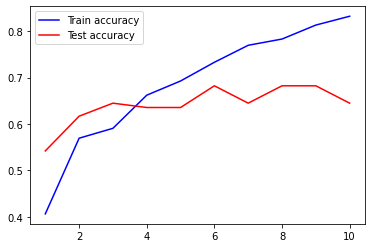

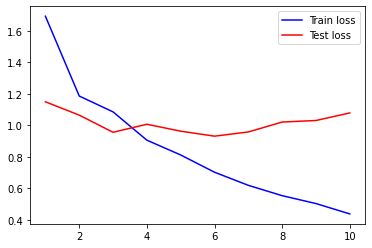

In [21]:
plt.plot(epochs, acc, 'b', label='Train accuracy')
plt.plot(epochs, val_acc, 'r', label='Test accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Train loss')
plt.plot(epochs, val_loss, 'r', label='Test loss')
plt.legend()
plt.show()